In [2]:
import math
from math import cos, sin, log, log10, pi
import numpy as np
from matplotlib import pyplot as plt
pi, math.e

(3.141592653589793, 2.718281828459045)

In [3]:
# setting
mass = 1.0   
T_max = 100.0    # final time
dt = 0.001        # time step
k = 1.0          # force constant

In [5]:
def const_force(x):
    return 1.0

In [7]:
# Harmonic oscillation
def force(x):
    return -x

In [8]:
def varlet_velocity(t=0.0, x=1.0, v=0.0, dt=0.001, t_final=T_max):
    x_lst = []
    v_lst = []
    x_lst.append(x)
    v_lst.append(v)
    for i in np.arange(t + dt, t_final + dt, dt):   # start from t + dt and end at t_final
        f = force(x)
        v = v + f/(2 * mass) * dt
        x = x + v * dt
        f = force(x)
        v = v + f/(2 * mass) * dt
#         print(dt, x, v)
        x_lst.append(x)
        v_lst.append(v)
    return x_lst, v_lst

In [9]:
x_lst, v_lst = varlet_velocity(dt=dt)

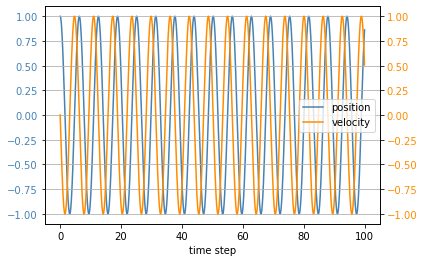

In [10]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('time step')
# ax1.set_ylabel('position', color='b')
pos, = ax1.plot(np.arange(0.0, T_max, dt), x_lst[:-1], label='position', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
vel, = ax2.plot(np.arange(0.0, T_max, dt), v_lst[:-1], label='velocity', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
plt.legend(handles=[pos, vel])
plt.grid(axis='both')
plt.savefig('xv.png')
plt.show()

### Plot Position Error and Velocity Erros with Different $dt$

In [15]:
# Define the range of decimal place
decimal_place = [-1, -7]

In [12]:
# Exact solution of x(t) and v(t) given x_0 and v_0
# x(t) = x_0 + v_0 * t + 1/2 * a * t^2
# v(t) = v_0 + a * t
def exact_pos_vec(t, x=1.0, v=0.0, a=1.0):
    x_t = x + v * t + (a * (t**2))/2
    v_t = v + a * t
    return x_t, v_t

In [13]:
def compute_error(exact_fun=exact_pos_vec, decimal_place=[-1, -7], t_final=T_max,\
                  flag_single_step=False, single_time=0.3):    
    e = list(range(decimal_place[0], decimal_place[1], -1))
    err_position = []
    err_velocity = []
    for _ in e:
        f = 10**(_)
        # if flag_single_step is set to True, then t_final is ignored
        if not flag_single_step:
            num_x_lst, num_v_lst = varlet_velocity(dt=f, t_final=t_final)
            exact_x, exact_v = exact_fun(t_final)
        else:
            x_0, v_0 = exact_fun(single_time)
            num_x_lst, num_v_lst = varlet_velocity(t=single_time,\
                                                   x=x_0, \
                                                   v=v_0, \
                                                   dt=f, t_final=single_time + f)
            exact_x, exact_v = exact_fun(single_time + f)
        # relative error
        err_x = abs((num_x_lst[-1] - exact_x) / exact_x)
        err_v = abs((num_v_lst[-1] - exact_v) / exact_v)
        err_position.append(err_x)
        err_velocity.append(err_v)
    return err_position, err_velocity

In [ ]:
err_position, err_velocity = compute_error()
err_position, err_velocity

In [ ]:
err_position, err_velocity = compute_error(decimal_place=decimal_place, exact_fun=exact_harmonic_pos_vec)
err_position, err_velocity

In [18]:
err_position, err_velocity = compute_error(exact_fun=exact_harmonic_pos_vec,\
                                           decimal_place=decimal_place,\
                                           flag_single_step=True, single_time=0.77) 
err_position, err_velocity

([0.00018447571731888943,
  0.009942778136951456,
  0.0009721106302339094,
  1.617758248455324e-13,
  3.0929580441192395e-16,
  9.696707683586512e-07],
 [8.214434198691072e-05,
  0.010058210450835941,
  0.0010287187031701101,
  8.595291166875282e-14,
  3.1896433729593694e-16,
  1.0312778970268293e-06])

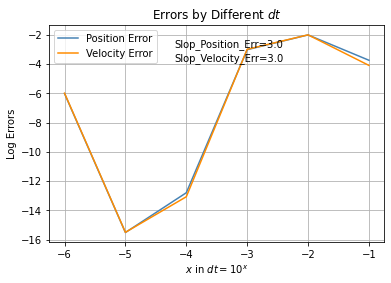

In [20]:
# new_e = e[::-1]
new_e = list(range(decimal_place[0], decimal_place[1], -1))[::-1]
new_err_position = [log10(_) for _ in err_position][::-1]
new_err_velocity = [log10(_) for _ in err_velocity][::-1]
err_pos, = plt.plot(new_e, new_err_position, color='steelblue', label=r'Position Error')
err_vel, = plt.plot(new_e, new_err_velocity, color='darkorange', label=r'Velocity Error')

######
# error bwteen numerical at (T_max - dt) and exact at T_max
######
# tt_new_err_position = [log10(_) for _ in test_pos_err][::-1]
# tt_new_err_velocity = [log10(_) for _ in test_vel_err][::-1]
# tt_err_pos, = plt.plot(new_e, tt_new_err_position, color='blue', label=r'Test Position Error')
# tt_err_vel, = plt.plot(new_e, tt_new_err_velocity, color='red', label=r'Test Velocity Error')

# plt.xticks(np.arange(-20, 1, 1), \
#            labels=[-20,'','','','',-15,'','','','',-10,'','','','',-5,'','','',''])
x_big = -1
x_small = -4
slop_err_pos = (new_err_position[x_big] - new_err_position[x_small])/(x_big - x_small)
slop_err_vel = (new_err_velocity[x_big] - new_err_velocity[x_small])/(x_big - x_small)
# slop_err_pos_1 = (new_err_position[-2] - new_err_position[-6])/(-2 - (-6))
# slop_err_vel_1 = (new_err_velocity[-2] - new_err_velocity[-6])/(-2 - (-6))
plt.legend(handles=[err_pos, err_vel])
plt.text(-4.2, -2.8, 'Slop_Position_Err=%1.1f'%slop_err_pos)
plt.text(-4.2, -3.8, 'Slop_Velocity_Err=%1.1f'%slop_err_vel)
# plt.text(-6, -4, 'Slop_Position_Err=%1.1f'%slop_err_pos_1)
# plt.text(-6, -4.7, 'Slop_Velocity_Err=%1.1f'%slop_err_vel_1)
plt.title(r'Errors by Different $dt$')
plt.xlabel(r'$x$ in $dt=10^{x}$')
plt.ylabel('Log Errors')
plt.grid()
plt.savefig('pos_vel_error.png')
plt.show()
plt.close()

### Plot Harmonic Oscillation Position Error and Velocity Erros with Different $dt$

In [17]:
# Exact solution of x(t) and v(t) given x_0 and v_0
# x(t) = cos(omega * t)
# v(t) = -omega * sin(omega * t)

omega = 1.0

def exact_harmonic_pos_vec(t):
    x_t = cos(omega * t)
    v_t = -1 * omega * sin(omega * t)
    return x_t, v_t